<a href="https://colab.research.google.com/github/MANDOJU1/pandas/blob/main/2_%EC%B6%9C%EC%83%9D%EC%95%84_%EC%88%98_%EB%B0%8F_%ED%95%A9%EA%B3%84_%EC%B6%9C%EC%82%B0%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 출생아 수 및 합계 출산율

#### 합계 출산율 : 한 여자가 가임기간 (15~49세)에 낳을 것으로 기대되는 평균 출생아 수

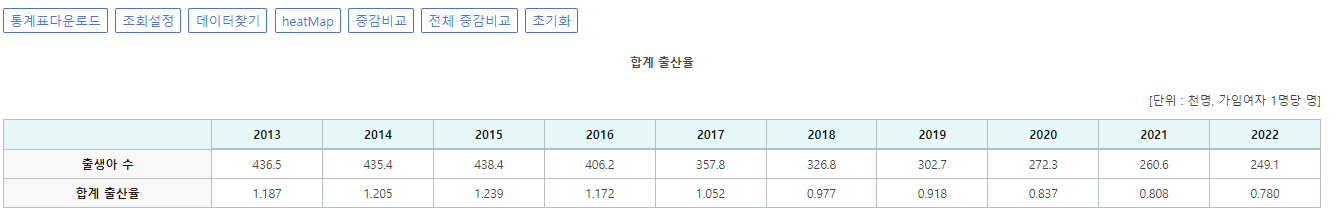

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.1 MB/s eta 0:00:00


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1. 데이터 로드
- stat.xlsx

In [34]:
df = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/stat.xlsx", skiprows=2, nrows=2, index_col=0)
df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
출생아 수,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10
합계 출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78


In [35]:
# 인덱스

df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [36]:
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [37]:
# 인덱스 명 수정 : 출생아\xa0수 → 출생아 수
# 컬럼명 수정 : 이름.columns = ["수정할 컬럼명 포함해서 전체 컬럼명"] / 이름.rename(columns={"원본컬럼명":"변경할컬럼명"})
df.rename(index={"출생아\xa0수":"출생아 수", "합계\xa0출산율":"합계 출산율"}, inplace=True)

In [38]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [39]:
# 출생아 수 : index
# loc : label 이용
# iloc : 위치 인덱스 이용

df.loc['출생아 수']

2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
2022    249.1
Name: 출생아 수, dtype: float64

In [46]:
# 행열 바꿈 : transpose() or T

# df.transpose()

df1 = df.T
df1

,출생아 수,합계 출산율
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837
2021,260.6,0.808
2022,249.1,0.780


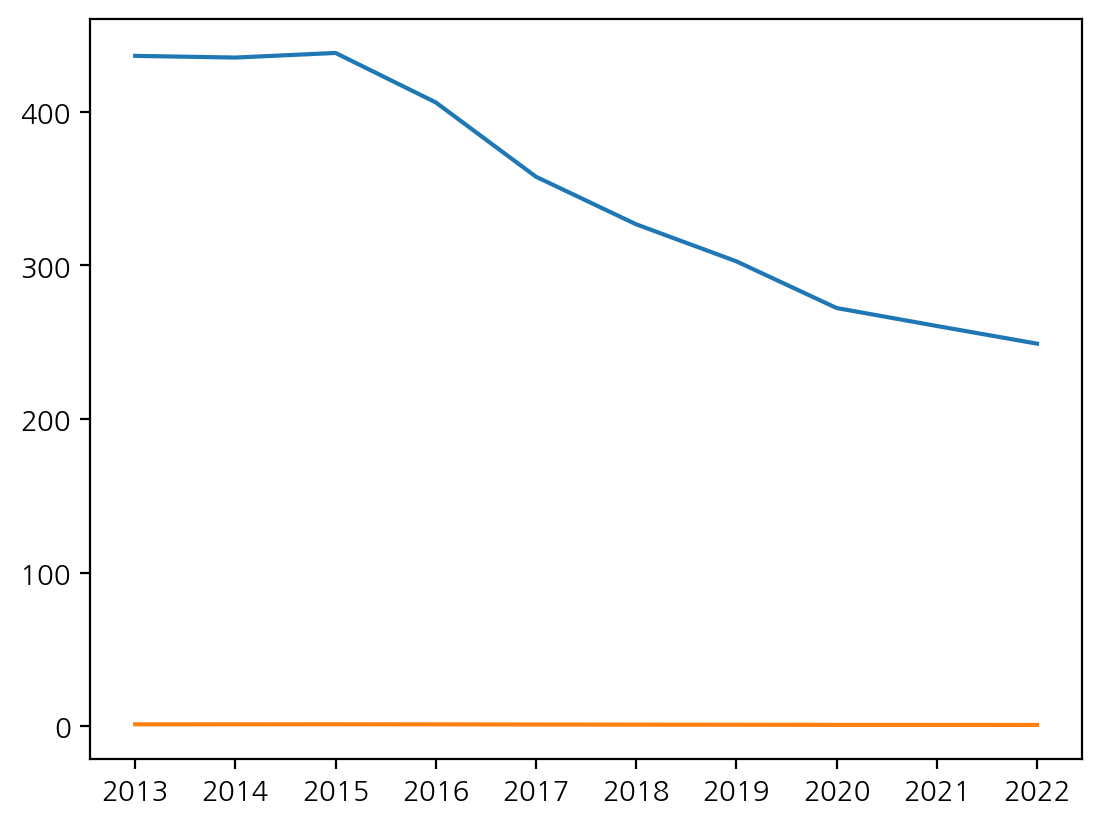

In [47]:
# 선 차트 작성
# matplotlib

plt.plot(df1.index, df1['출생아 수']);
plt.plot(df1.index, df1['합계 출산율']);

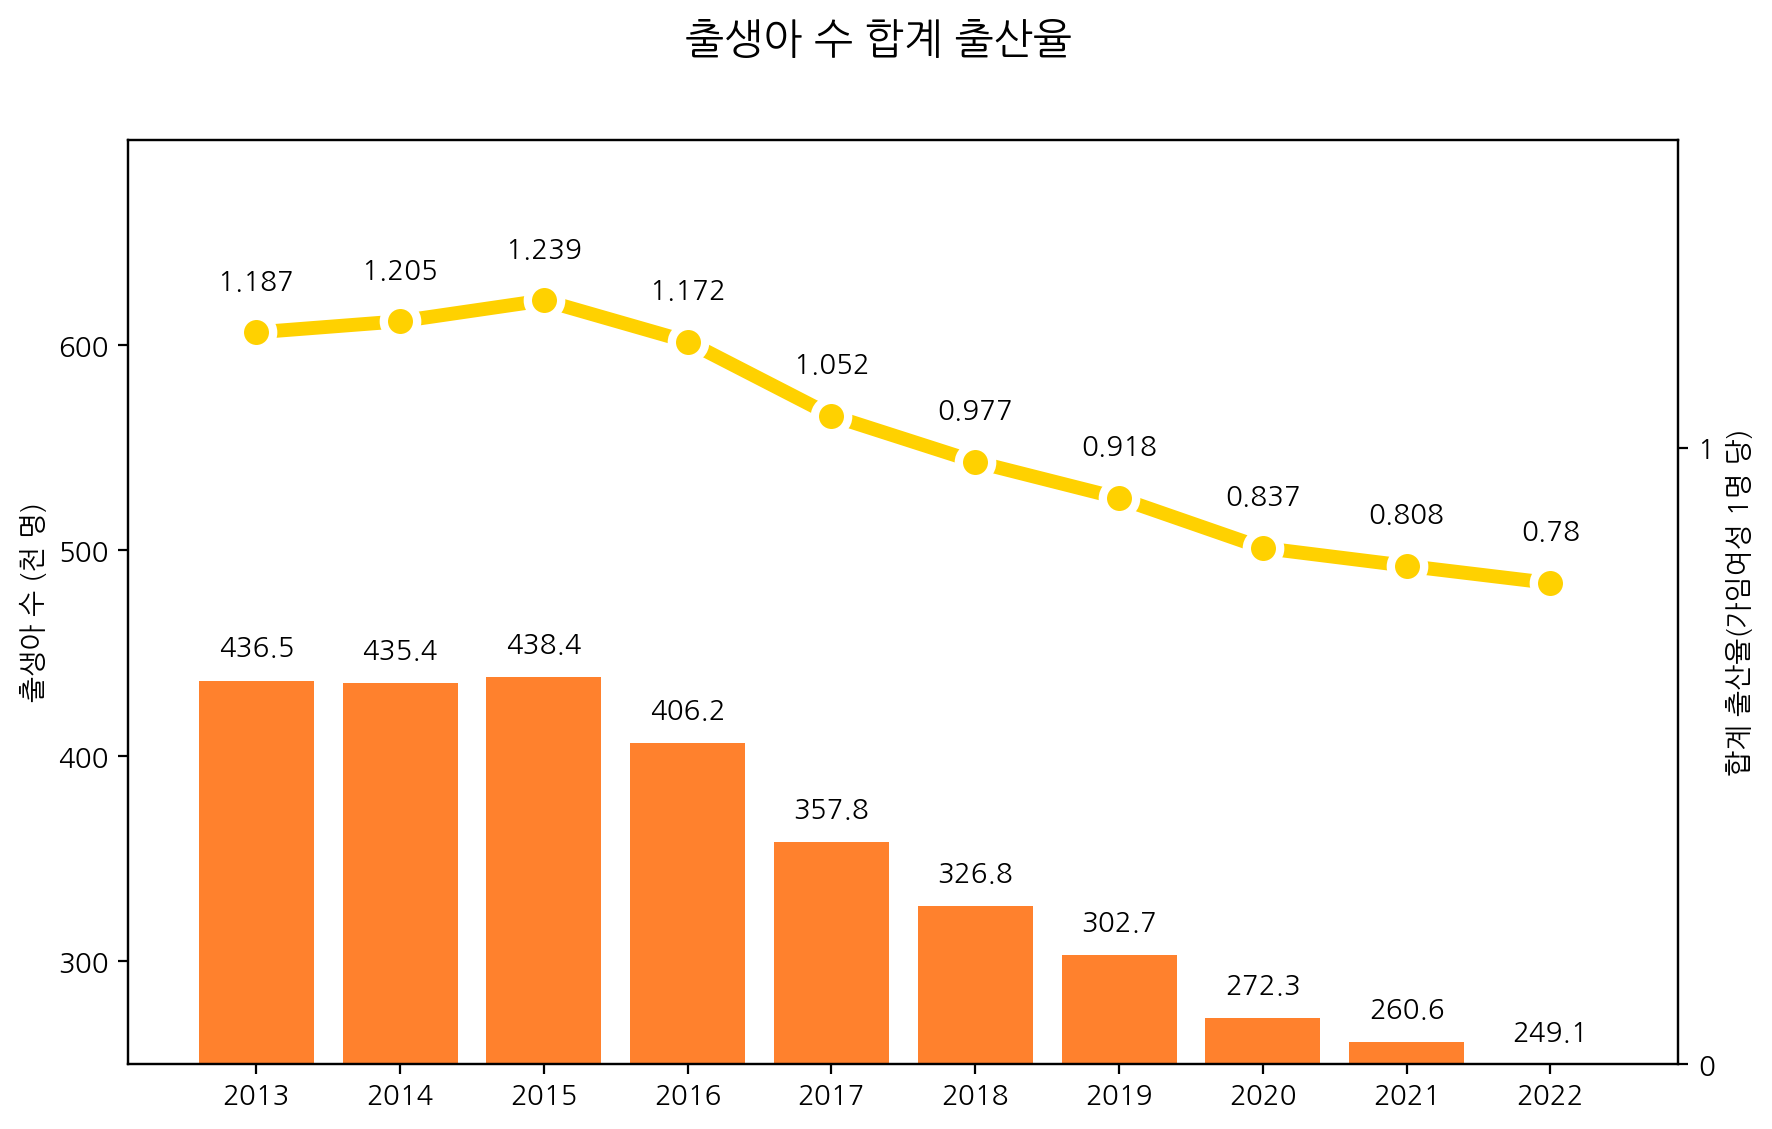

In [58]:
# 축 설정
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('출생아 수 합계 출산율', fontsize=15)

ax.set_ylabel('출생아 수 (천 명)')
ax.set_ylim(250, 700)
ax.set_yticks([300,400,500,600])
ax.bar(df1.index, df1['출생아 수'], color="#ff812d");

# 숫자
for idx, val in enumerate(df1['출생아 수']):
  plt.text(idx, val + 12, val, ha="center")

# z축
ax2 = ax.twinx()
ax2.set_ylabel('합계 출산율(가임여성 1명 당)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0,1])
ax2.plot(df1.index, df1['합계 출산율'],  color="#ffd100", marker="o", ms=12, lw=5, mec="w", mew=3);

# 숫자
for idx, val in enumerate(df1['합계 출산율']):
  plt.text(idx, val + 0.07, val, ha="center")

<Axes: xlabel='None', ylabel='출생아 수'>

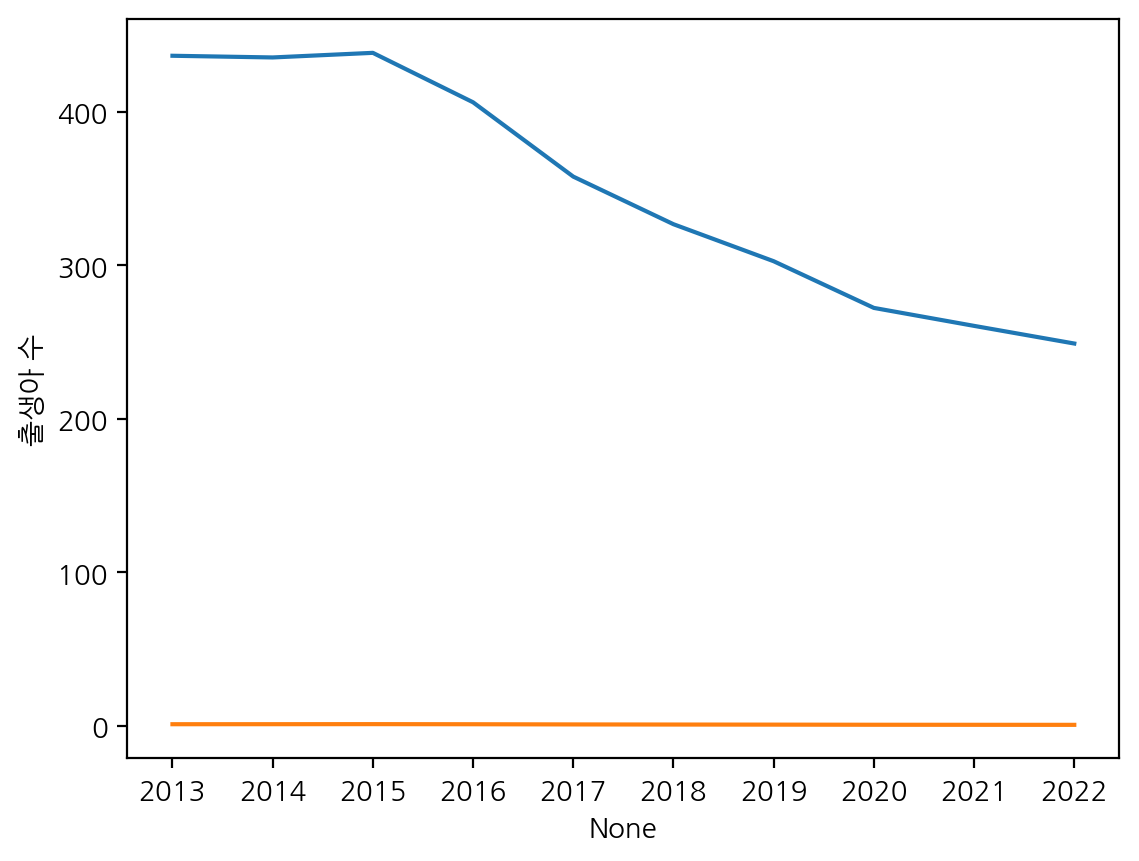

In [60]:
sns.lineplot(data=df1, x=df1.index, y='출생아 수')
sns.lineplot(data=df1, x=df1.index, y='합계 출산율')